| Feature Selection|<font size="5">  اختيار افضل الخصائص المؤثرة </font>|
|-:|-:|
||<img src="https://miro.medium.com/max/594/1*nyC9bOwnK16Cl8jFYTyEFQ.png" width=400></img>|
||<font size="4"> تحميل البيانات ومعالجتها </font>|
||<font size="4">في تعويض القيم الناقصة SimpleImputer  توظيف خوارزمية </font>|
||<font size="4">في اختيار أفضل الخصائص المؤثرة Lasso  توظيف خوارزمية </font>|
||<font size="4"> التخطيط البياني لأفضل الخصائص التي تم الأحتفاظ بها </font>|
||<font size="4"> Metrics   تقويم أداء الخوارزمية </font>|


https://youtu.be/T4nZDuakYlU?list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq

https://youtu.be/xlHk4okO8Ls

https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15

https://github.com/Yimeng-Zhang/feature-engineering-and-feature-selection/blob/master/4.5_Demo_Feature_Selection_Hybrid_method.ipynb



Lasso Regression (L1 Regularization)

What it is: Lasso (Least Absolute Shrinkage and Selection Operator) regression is a linear regression technique that adds a penalty term to the ordinary least squares (OLS) cost function. This penalty is proportional to the absolute value of the coefficients.   

Why it's used:

Regularization: The penalty term shrinks the coefficients of less important features towards zero. This helps prevent overfitting, especially when you have many features or when some features are highly correlated.
Feature Selection: A key feature of Lasso is that it can force some coefficients to become exactly zero. This effectively performs feature selection, automatically identifying and discarding irrelevant features. This is different from Ridge regression (L2 regularization), which shrinks coefficients but rarely sets them to zero.
The Cost Function: The cost function Lasso minimizes is:

RSS + alpha * sum(|beta_j|)
 Where:

RSS is the residual sum of squares (the standard OLS term).
alpha is the regularization parameter (a hyperparameter you need to tune). A higher alpha means stronger regularization (more shrinkage and more coefficients set to zero).
beta_j are the regression coefficients.
sum(|beta_j|) is the sum of the absolute values of the coefficients (the L1 penalty).
2. Cross-Validation (CV)

What it is: Cross-validation is a technique for evaluating how well a model will generalize to unseen data. It involves splitting the data into multiple "folds," training the model on some folds (the training set), and evaluating it on the remaining fold (the validation set). This is repeated multiple times, with each fold serving as the validation set once.
Why it's used: It provides a more reliable estimate of model performance than a single train/test split, especially when you have limited data. It helps you choose the best hyperparameters (like alpha in Lasso) without "peeking" at the final test set.
Common Types:
k-fold Cross-Validation: The data is divided into k folds.
Leave-One-Out Cross-Validation (LOOCV): Each data point is used as the validation set once (extreme case of k-fold where k = number of samples).
Stratified k-fold: Ensures that each fold has roughly the same proportion of samples from each class (important for classification problems with imbalanced classes).
3. LassoCV in scikit-learn

sklearn.linear_model.LassoCV: This class in scikit-learn combines Lasso regression with cross-validation to automatically find the best value of the regularization parameter (alpha).
cv parameter:: Determines the cross-validation splitting strategy. If None, to use the default 5-fold cross-validation.
alphas parameter:: List of alphas where to compute the models. If None alphas are set automatically.

In [14]:
#تحميل البيانات
import pandas as pd
df= pd.read_csv("../data/HousePrice_4.csv", index_col=0)

In [15]:
df.sample(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold,Remodeled,Age,Isnew
65,60,RL,76.0,9591,Pave,3,Lvl,AllPub,Inside,2,...,Normal,317000,3616,151,2.5,-8.660254e-01,0.500000,1,2,0
473,20,RL,110.0,14977,Pave,2,Lvl,AllPub,Inside,2,...,Partial,440000,3952,63,3.0,-5.000000e-01,-0.866025,1,0,0
1323,30,RL,50.0,5330,Pave,3,HLS,AllPub,Inside,2,...,Normal,82500,1128,0,1.0,-2.449294e-16,1.000000,1,59,0


## Conduct Recursive Feature Elimination

In [16]:
df.select_dtypes("number").head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,...,MiscVal,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold,Remodeled,Age,Isnew
0,60,65.0,8450,3,2,7,5,2.0,196.0,2,...,0,208500,2566,61,3.5,8.660254e-01,5.000000e-01,0,5,0
1,20,80.0,9600,3,2,6,8,0.0,0.0,1,...,0,181500,2524,0,2.5,5.000000e-01,-8.660254e-01,0,31,0
2,60,68.0,11250,2,2,7,5,2.0,162.0,2,...,0,223500,2706,42,3.5,-1.000000e+00,-1.836970e-16,1,6,0
3,70,60.0,9550,2,2,7,5,0.0,0.0,1,...,0,140000,2473,307,2.0,8.660254e-01,5.000000e-01,1,36,0
4,60,84.0,14260,2,2,8,5,2.0,350.0,2,...,0,250000,3343,84,3.5,-2.449294e-16,1.000000e+00,0,8,0


In [22]:
df.isna().sum().sort_values(ascending=False).head(10)

LotFrontage     258
GarageFinish     81
GarageCond       81
GarageType       81
GarageQual       81
BsmtExposure     38
BsmtFinType2     38
BsmtCond         37
BsmtQual         37
BsmtFinType1     37
dtype: int64

In [33]:
missing_col= df.isna().sum().sort_values(ascending=False).head(10).head(10).index.tolist()

In [37]:
df.dropna(inplace=True)

In [38]:
from sklearn.impute import SimpleImputer

imput= SimpleImputer(strategy="most_frequent")
df[missing_col]= imput.fit_transform(df[missing_col])

In [39]:
# تحديد الخصائص والهدف
X, y = df.select_dtypes("number").drop("SalePrice", axis=1), df.SalePrice

In [40]:
from sklearn.linear_model import   LassoCV
reg = LassoCV( )
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)


Best alpha using built-in LassoCV: 211092.652435
Best score using built-in LassoCV: 0.764612


In [41]:
# ضرورة التأكد من غياب بعض القيم
(X.isnull().sum()/X.shape[0]).sort_values(ascending=False)

MSSubClass      0.0
LotArea         0.0
LotShape        0.0
LandSlope       0.0
OverallQual     0.0
OverallCond     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
BsmtFinSF1      0.0
BsmtFinSF2      0.0
BsmtUnfSF       0.0
HeatingQC       0.0
CentralAir      0.0
1stFlrSF        0.0
2ndFlrSF        0.0
LowQualFinSF    0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
KitchenQual     0.0
TotRmsAbvGrd    0.0
Functional      0.0
Fireplaces      0.0
GarageArea      0.0
PavedDrive      0.0
WoodDeckSF      0.0
PoolArea        0.0
MiscVal         0.0
TotalSF         0.0
TotalPorchSF    0.0
TotalBath       0.0
SnMoSold        0.0
CsMoSold        0.0
Remodeled       0.0
Age             0.0
Isnew           0.0
dtype: float64

## Imputation   تعويض القيم الناقصة

In [ ]:
! pip install -U scikit-learn

     |████████████████████████████████| 6.8MB 3.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Features  Selection

In [ ]:
from sklearn.impute import SimpleImputer

imput= SimpleImputer(strategy="mean")
# X[ ["LotFrontage","MasVnrArea"]]= imput.fit_transform(X[["LotFrontage","MasVnrArea"]])
imput.fit_transform(X )[1]

array([ 2.00000000e+01,  8.00000000e+01,  9.60000000e+03,  3.00000000e+00,
        2.00000000e+00,  6.00000000e+00,  8.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  2.00000000e+00,  2.00000000e+00,
        2.00000000e+00,  3.00000000e+00,  4.00000000e+00,  9.78000000e+02,
        1.00000000e+00,  0.00000000e+00,  2.84000000e+02,  4.00000000e+00,
        1.00000000e+00,  1.26200000e+03,  0.00000000e+00,  0.00000000e+00,
        3.00000000e+00,  1.00000000e+00,  1.00000000e+00,  6.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  4.60000000e+02,
        2.00000000e+00,  2.00000000e+00,  2.00000000e+00,  2.98000000e+02,
        0.00000000e+00,  0.00000000e+00,  2.52400000e+03,  0.00000000e+00,
        2.50000000e+00,  5.00000000e-01, -8.66025404e-01,  0.00000000e+00,
        3.10000000e+01,  0.00000000e+00])

In [43]:
X = pd.DataFrame(imput.fit_transform(X ),columns= X.columns )

In [49]:
X.sample(3)

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,ExterCond,...,PoolArea,MiscVal,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold,Remodeled,Age,Isnew
1238,20.0,7200.0,3.0,2.0,5.0,7.0,0.0,0.0,1.0,2.0,...,0.0,0.0,1864.0,80.0,1.0,0.5,-0.866025,0.0,57.0,0.0
603,20.0,12464.0,1.0,1.0,5.0,5.0,0.0,0.0,1.0,3.0,...,0.0,0.0,2080.0,0.0,2.0,-0.5,0.866025,0.0,13.0,0.0
730,20.0,8978.0,2.0,2.0,5.0,5.0,0.0,0.0,1.0,2.0,...,0.0,0.0,1896.0,0.0,1.0,0.5,-0.866025,0.0,39.0,0.0


In [77]:
# تقسيم البيانات
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)

In [78]:
from sklearn.linear_model import   LassoCV
reg = LassoCV()
reg.fit(X_train, y_train)  # Train on the training data

print("Best alpha:", reg.alpha_)
print("Training score:", reg.score(X_train, y_train))  # Score on training data (still biased)
print("Test score:", reg.score(X_test, y_test))    

Best alpha: 196011.22731447648
Training score: 0.7848889610054453
Test score: 0.7386858048944802


In [80]:
coef = pd.Series(reg.coef_, index = X_train.columns)


Sorted Coefficients (Absolute Value):
 Age             299.830813
GarageArea       64.420239
TotalSF          50.128520
MasVnrArea       46.449365
BsmtFinSF1       23.013812
2ndFlrSF         21.924047
WoodDeckSF       17.901649
1stFlrSF         14.079887
BsmtFinSF2        1.880940
MiscVal           0.639956
LotArea           0.292237
LotShape          0.000000
MSSubClass        0.000000
OverallQual       0.000000
LandSlope         0.000000
CentralAir        0.000000
ExterCond         0.000000
BsmtUnfSF         0.000000
MasVnrType        0.000000
ExterQual         0.000000
OverallCond       0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
LowQualFinSF      0.000000
HeatingQC         0.000000
Functional        0.000000
Fireplaces        0.000000
TotRmsAbvGrd      0.000000
PoolArea          0.000000
PavedDrive        0.000000
TotalBath         0.000000
TotalPorchSF      0.000000
SnMoSold          0.000000
CsMoSold          0.000000
Remodeled      

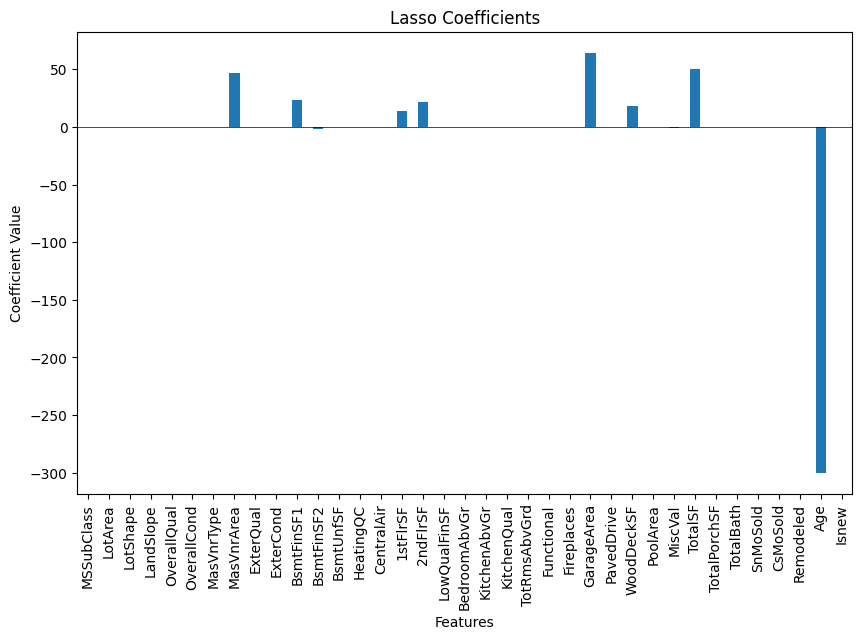

In [81]:
# Sort the coefficients by absolute value (magnitude)
coef_sorted = coef.abs().sort_values(ascending=False)
print("\nSorted Coefficients (Absolute Value):\n", coef_sorted)

# Plot the coefficients
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
coef.plot(kind='bar')
plt.title('Lasso Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.axhline(0, color='black', linewidth=0.5)  # Add a horizontal line at y=0
plt.show()

In [82]:
coef

MSSubClass       -0.000000
LotArea           0.292237
LotShape         -0.000000
LandSlope         0.000000
OverallQual       0.000000
OverallCond       0.000000
MasVnrType        0.000000
MasVnrArea       46.449365
ExterQual         0.000000
ExterCond         0.000000
BsmtFinSF1       23.013812
BsmtFinSF2       -1.880940
BsmtUnfSF        -0.000000
HeatingQC         0.000000
CentralAir        0.000000
1stFlrSF         14.079887
2ndFlrSF         21.924047
LowQualFinSF     -0.000000
BedroomAbvGr     -0.000000
KitchenAbvGr     -0.000000
KitchenQual       0.000000
TotRmsAbvGrd     -0.000000
Functional       -0.000000
Fireplaces        0.000000
GarageArea       64.420239
PavedDrive        0.000000
WoodDeckSF       17.901649
PoolArea          0.000000
MiscVal          -0.639956
TotalSF          50.128520
TotalPorchSF      0.000000
TotalBath         0.000000
SnMoSold         -0.000000
CsMoSold         -0.000000
Remodeled         0.000000
Age            -299.830813
Isnew             0.000000
d

In [83]:
import numpy as np
coef[np.abs(coef)>0]

LotArea         0.292237
MasVnrArea     46.449365
BsmtFinSF1     23.013812
BsmtFinSF2     -1.880940
1stFlrSF       14.079887
2ndFlrSF       21.924047
GarageArea     64.420239
WoodDeckSF     17.901649
MiscVal        -0.639956
TotalSF        50.128520
Age          -299.830813
dtype: float64

In [84]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 11 variables and eliminated the other 26 variables


In [85]:
# فرز الخصائص حسب الأهمية
import  numpy as np
coef[np.abs(coef)>0].sort_values(ascending=False)

GarageArea     64.420239
TotalSF        50.128520
MasVnrArea     46.449365
BsmtFinSF1     23.013812
2ndFlrSF       21.924047
WoodDeckSF     17.901649
1stFlrSF       14.079887
LotArea         0.292237
MiscVal        -0.639956
BsmtFinSF2     -1.880940
Age          -299.830813
dtype: float64

In [86]:
np.abs(coef).nlargest(10)

Age           299.830813
GarageArea     64.420239
TotalSF        50.128520
MasVnrArea     46.449365
BsmtFinSF1     23.013812
2ndFlrSF       21.924047
WoodDeckSF     17.901649
1stFlrSF       14.079887
BsmtFinSF2      1.880940
MiscVal         0.639956
dtype: float64

In [87]:
# قائمة الخصائص الأكثر أهمية
features_kept=np.abs(coef).nlargest(10).index
features_kept

Index(['Age', 'GarageArea', 'TotalSF', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF',
       'WoodDeckSF', '1stFlrSF', 'BsmtFinSF2', 'MiscVal'],
      dtype='object')

Text(0.5, 1.0, 'Feature importance using Lasso Model')

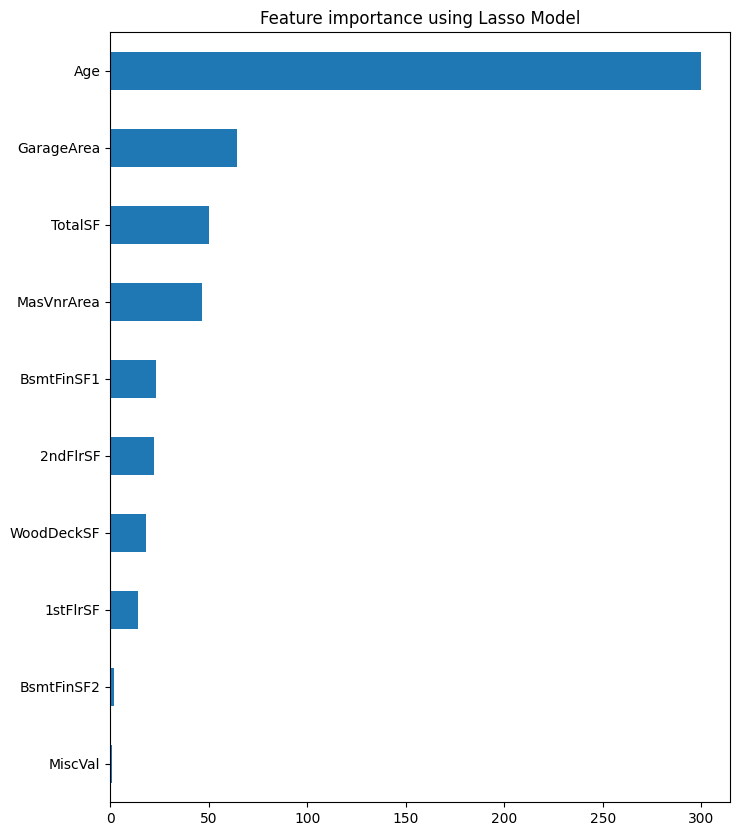

In [88]:
# التخطيط البياني لأهم الخصائص
import matplotlib.pyplot as plt

imp_coef = np.abs(coef).nlargest(10).sort_values()
import matplotlib
plt.figure(figsize=(8.0, 10.0))
imp_coef.plot(kind = "barh")
#  np.log1p(imp_coef)
plt.title("Feature importance using Lasso Model")

In [60]:
# اظهار البيانات
X[features_kept].head()

,Age,GarageArea,TotalSF,MasVnrArea,WoodDeckSF,BsmtFinSF1,2ndFlrSF,BsmtFinSF2,MiscVal,LotArea
0,5.0,548.0,2566.0,196.0,0.0,706.0,854.0,0.0,0.0,8450.0
1,31.0,460.0,2524.0,0.0,298.0,978.0,0.0,0.0,0.0,9600.0
2,6.0,608.0,2706.0,162.0,0.0,486.0,866.0,0.0,0.0,11250.0
3,36.0,642.0,2473.0,0.0,0.0,216.0,756.0,0.0,0.0,9550.0
4,8.0,836.0,3343.0,350.0,192.0,655.0,1053.0,0.0,0.0,14260.0


In [61]:
# اضافة عمود الهدف
df_select= pd.concat([X[features_kept], y], axis=1)
df_select.sample(3)

,Age,GarageArea,TotalSF,MasVnrArea,WoodDeckSF,BsmtFinSF1,2ndFlrSF,BsmtFinSF2,MiscVal,LotArea,SalePrice
567,27.0,600.0,1886.0,0.0,42.0,943.0,0.0,0.0,0.0,7032.0,214000.0
306,58.0,0.0,1725.0,0.0,0.0,0.0,371.0,0.0,0.0,7920.0,225000.0
661,6.0,504.0,3342.0,40.0,188.0,0.0,482.0,0.0,0.0,11194.0,402000.0


In [62]:
# حفظ البيانات
df_select.to_csv("../data/features_kept1.csv")

In [63]:
",".join(df_select.columns)

'Age,GarageArea,TotalSF,MasVnrArea,WoodDeckSF,BsmtFinSF1,2ndFlrSF,BsmtFinSF2,MiscVal,LotArea,SalePrice'

In [65]:
# حفظ الخصائص التي تم تحديدها
with open("../data/features_selected.txt", "w") as f :
  f.write(",".join(df_select.columns))


In [67]:
# التأكد من حفظ الملف

open("../data/features_selected.txt" , "r").read()


'Age,GarageArea,TotalSF,MasVnrArea,WoodDeckSF,BsmtFinSF1,2ndFlrSF,BsmtFinSF2,MiscVal,LotArea,SalePrice'

In [69]:
# تحميل الخصائص على شكل مصفوفة
fl=open("../data/features_selected.txt" , "r").read().split(",")
fl

['Age',
 'GarageArea',
 'TotalSF',
 'MasVnrArea',
 'WoodDeckSF',
 'BsmtFinSF1',
 '2ndFlrSF',
 'BsmtFinSF2',
 'MiscVal',
 'LotArea',
 'SalePrice']

In [70]:
# اظهار البيانات التي تم احتيارها فقط
df[fl]

,Age,GarageArea,TotalSF,MasVnrArea,WoodDeckSF,BsmtFinSF1,2ndFlrSF,BsmtFinSF2,MiscVal,LotArea,SalePrice
0,5,548,2566,196.0,0,706,854,0,0,8450,208500
1,31,460,2524,0.0,298,978,0,0,0,9600,181500
2,6,608,2706,162.0,0,486,866,0,0,11250,223500
3,36,642,2473,0.0,0,216,756,0,0,9550,140000
4,8,836,3343,350.0,192,655,1053,0,0,14260,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,7,460,2600,0.0,0,0,694,0,0,7917,175000
1456,22,500,3615,119.0,349,790,0,163,0,13175,210000
1457,4,252,3492,0.0,0,275,1152,0,2500,9042,266500
1458,14,240,2156,0.0,366,49,0,1029,0,9717,142125


In [72]:
df= pd.read_csv("../data/HousePrice_4.csv",usecols=fl ) #index_col=0)
df.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,GarageArea,WoodDeckSF,MiscVal,SalePrice,TotalSF,Age
0,8450,196.0,706,0,854,548,0,0,208500,2566,5
1,9600,0.0,978,0,0,460,298,0,181500,2524,31
2,11250,162.0,486,0,866,608,0,0,223500,2706,6
3,9550,0.0,216,0,756,642,0,0,140000,2473,36
4,14260,350.0,655,0,1053,836,192,0,250000,3343,8


In [ ]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=5)

In [ ]:
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

ValueError: ignored

In [ ]:

# Create recursive feature eliminator that scores features by mean squared errors
rfecv = RFECV(estimator=ols, step=1, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator
rfecv.fit(X, y)

# Recursive feature elimination
rfecv.transform(X)

In [ ]:
# write dataframe to a csv file
